In [1]:
import scenarion
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier

# Load and Prep the data

In [2]:
# Load the data
data = load_iris()

# Move the data into a pandas DataFrame
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

df['species'] = data['target']
df.species.replace({i:species for i, species in enumerate(data['target_names'])}, inplace=True)

# view a sample of the DataFrame
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
141,6.9,3.1,5.1,2.3,virginica
24,4.8,3.4,1.9,0.2,setosa
140,6.7,3.1,5.6,2.4,virginica
78,6.0,2.9,4.5,1.5,versicolor


# Train a model

In [3]:
y_col = 'species'
x_cols = [col for col in df.columns if col != y_col]

train_x = df[x_cols]
train_y = df[y_col]

model = ExtraTreesClassifier(n_estimators=100, min_samples_leaf=10)
model.fit(train_x, train_y);

# Use Scenarion to interpret the model

Testing Scenarios: 100%|██████████| 150/150 [00:05<00:00, 27.13it/s]


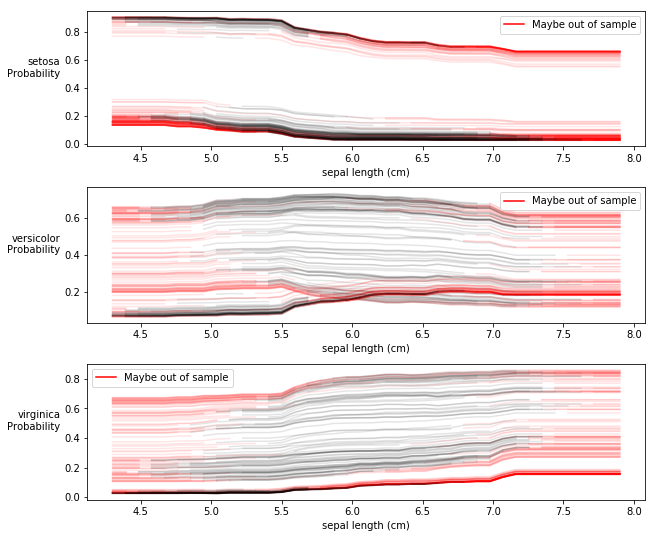

In [4]:
col_to_test = 'sepal length (cm)'
scenarios_df = scenarion.test_scenarios(model, df, x_cols,
                                    feat_to_test=col_to_test, n_samples='all')

Testing Scenarios: 100%|██████████| 150/150 [00:05<00:00, 27.94it/s]


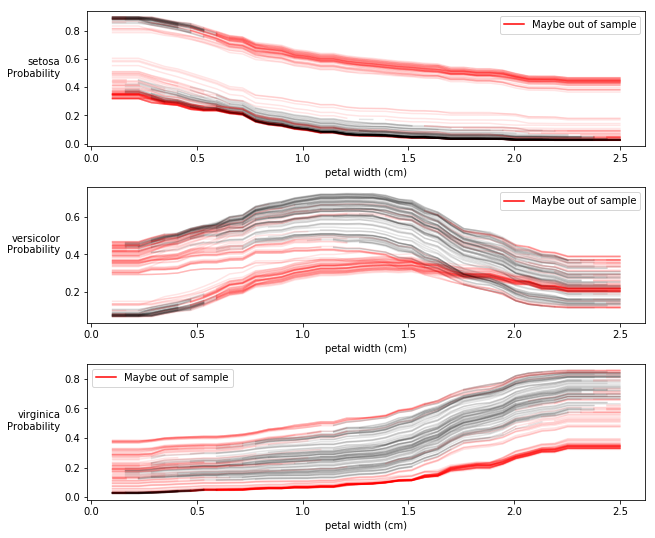

In [6]:
col_to_test = 'petal width (cm)'
scenarios_df = scenarion.test_scenarios(model, df, x_cols,
                                feat_to_test=col_to_test, n_samples='all')